# Clustering de documents

## Imports

In [225]:
import collections
import os
import string
import sys
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import yake

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [227]:
data_path = "../../data/txt/"

## Choisir une décennie

In [228]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [229]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [230]:
# Exemple de fichiers
files[:700]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-01-28_01-00011.txt',
 'KB_JB838_1960-01-28_01-00021.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-01-31_01-00024.txt',
 'KB_JB838_1960-02-03_01-00019.txt',
 'KB_JB838_1960-02-13_01-00020.txt',
 'KB_JB838_1960-02-19_01-00011.txt',
 'KB_JB838_1960-02-20_01-00006.txt',
 'KB_JB838_1960-02-24_01-00020.txt',
 'KB_JB838_1960-02-26_01-00001.txt',
 'KB_JB838_1960-02-26_01-00011.txt',
 'KB_JB838_1960-03-04_01-00010.txt',
 'KB_JB838_1960-03-06_01-00004.txt',
 'KB_JB838_1960-03-08_01-00008.txt',
 'KB_JB838_1960-03-09_01-00001.txt',
 'KB_JB838_1960-03-11_01-00020.txt',
 'KB_JB838_1960-03-11_01-00022.txt',
 'KB_JB838_1960-03-12_01-00007.txt',
 'KB_JB838_1960-03-13_01-00009.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-03-18_01-00009.txt',
 

In [231]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [232]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [233]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [234]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [235]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [236]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-01-21_01-00014.txt',
     'KB_JB838_1960-01-22_01-00015.txt',
     'KB_JB838_1960-02-03_01-00019.txt',
     'KB_JB838_1960-02-13_01-00020.txt',
     'KB_JB838_1960-02-24_01-00020.txt',
     'KB_JB838_1960-03-11_01-00020.txt',
     'KB_JB838_1960-03-11_01-00022.txt',
     'KB_JB838_1960-03-25_01-00020.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-01_01-00020.txt',
     'KB_JB838_1960-04-01_01-00022.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-05_01-00016.txt',
     'KB_JB838_1960-04-13_01-00017.txt',
     'KB_JB838_1960-04-14_01-00016.txt',
     'KB_JB838_1960-04-20_01-00016.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-05-28_01-00021.txt',
     'KB_JB838_1960-07-06_01-00020.txt',
     'KB_JB838_1960-07-14_01-00015.txt',
     'KB_JB838_1960-08-04_01-00018.txt',
     'KB_JB838_1960-08-13_01-00016.txt',
     'KB_JB838_1960-08-25_01-00021.txt',
     'KB_JB838_1

In [237]:
clustering[1]
 

['KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-01-28_01-00011.txt',
 'KB_JB838_1960-01-28_01-00021.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-01-31_01-00024.txt',
 'KB_JB838_1960-02-19_01-00011.txt',
 'KB_JB838_1960-02-20_01-00006.txt',
 'KB_JB838_1960-02-26_01-00001.txt',
 'KB_JB838_1960-02-26_01-00011.txt',
 'KB_JB838_1960-03-04_01-00010.txt',
 'KB_JB838_1960-03-06_01-00004.txt',
 'KB_JB838_1960-03-08_01-00008.txt',
 'KB_JB838_1960-03-09_01-00001.txt',
 'KB_JB838_1960-03-12_01-00007.txt',
 'KB_JB838_1960-03-13_01-00009.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-03-18_01-00009.txt',
 'KB_JB838_1960-03-20_01-00014.txt',
 'KB_JB838_1960-04-05_01-00004.txt',
 'KB_JB838_1960-04-06_01-00008.txt',
 'KB_JB838_1960-04-06_01-00023.txt',
 'KB_JB838_1960-04-13_01-00002.txt',
 'KB_JB838_1960-04-16_01-00002.txt',
 'KB_JB838_1960-04-23_01-00005.txt',
 'KB_JB838_1960-05-03_01-00013.txt',
 

## Visualiser les clusters

In [238]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [239]:
reduced_vectors[:300]

array([[ 4.99251604e-01, -4.39417552e-01],
       [-2.28873387e-01,  1.37482466e-03],
       [-2.79290122e-01, -1.57114321e-02],
       [ 2.86232757e-01,  5.16791862e-01],
       [ 3.06998602e-01,  5.18683537e-01],
       [-2.89694655e-01, -9.04750004e-02],
       [-4.74447191e-02,  4.05317197e-02],
       [-6.06392493e-02,  1.19800527e-01],
       [-2.23477243e-01, -5.22471780e-02],
       [-1.21660659e-01,  7.45922918e-02],
       [ 4.54596334e-01, -2.75482551e-01],
       [ 5.23277118e-01, -3.54894093e-01],
       [-3.13694019e-01, -6.54137016e-02],
       [-2.42584491e-01, -4.77811977e-02],
       [ 1.26079712e-02,  1.87502664e-01],
       [-2.62486845e-01, -6.12239764e-02],
       [-1.58116324e-01,  3.68334347e-02],
       [-2.91138043e-01, -3.11628471e-02],
       [-2.58402663e-01, -5.45190287e-02],
       [-3.21351607e-01, -7.87166884e-02],
       [-2.70690829e-01, -7.98990212e-02],
       [ 5.38797622e-01, -3.51130237e-01],
       [ 3.15952244e-01,  2.04489493e-01],
       [-2.

### Générer le plot

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

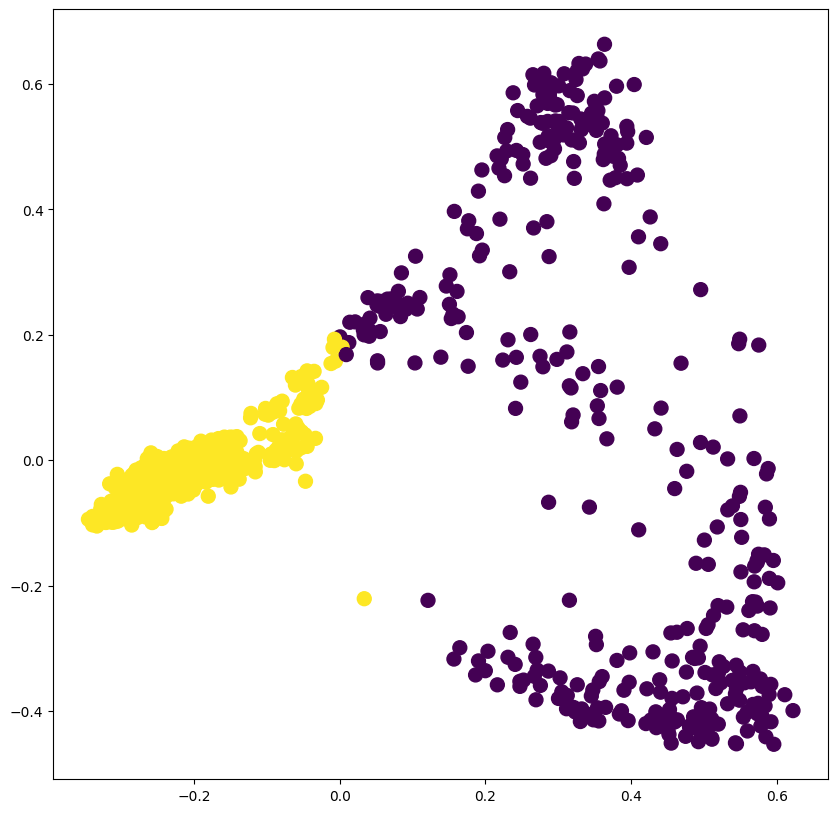

In [240]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [244]:
# Choisir une année
year = 1960

In [245]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "ser", "lot",]
sw = set(sw)


In [246]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

NameError: name 'WordCloud' is not defined